# Code Example of a Neural Network for The Function XOR

Based on the implementation by [Chih-Ling Hsu](https://chih-ling-hsu.github.io/2017/08/30/NN-XOR).

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
np.random.seed(12)

In [2]:
def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

def sig_derivative(x):
    return sig(x)*(1.0 - sig(x))

In [3]:
def tanh(x):
    return (1.0 - np.exp(-2*x))/(1.0 + np.exp(-2*x))

def tanh_derivative(x):
    return (1 + x)*(1 - x)

In [4]:
class NeuralNetwork:
    #########
    # parameters
    # ----------
    # self:      the class object itself
    # net_arch:  consists of a list of integers, indicating
    #            the number of neurons in each layer, i.e. the network architecture
    #########
    def __init__(self, 
                 net_arch,
                 act= 'tanh',
                 W= None):
        
        np.random.seed(0)
        
        if act == 'sig':
            self.activity = sig
            self.activity_derivative = sig_derivative
            
        if act == 'tanh':
            self.activity = tanh
            self.activity_derivative = tanh_derivative
            
        # Initialized the weights, making sure we also 
        # initialize the weights for the biases that we will add later
        #self.activity = tanh
        #self.activity_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1
        self.arch = net_arch
        
        if W is None:
            self.weights = []
            # Random initialization with range of weight values (-1,1)
            for layer in range(self.layers - 1):
                w_ = 2*np.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1
                self.weights.append(w_)
        else:
            self.weights = W
    
    def _forward_prop(self, x):
        y = x

        for i in range(len(self.weights)-1):
            activation = np.dot(y[i], self.weights[i])
            activity = self.activity(activation)

            # add the bias for the next layer ### CHECK THOSE BIAS
            activity = np.concatenate((np.ones(1), np.array(activity)))
            y.append(activity)

        # last layer
        activation = np.dot(y[-1], self.weights[-1])
        activity = self.activity(activation)
        y.append(activity)
        
        return y
    
    
    def forward(self, x):
        
        ones = np.ones((1, x.shape[0]))
        Z = np.concatenate((ones.T, x), axis=1)

              
        int_ = []
        int_.append(x)
        
        for i in range(len(self.weights)-1):
            
            activation = np.dot(Z, self.weights[i])
            activity = self.activity(activation)
            
            int_.append(activity)
            
            Z = activity
            Z = np.concatenate((ones.T, Z), axis=1)
            
        # Last layer
        activation = np.dot(Z, self.weights[-1])
        activity = self.activity(activation)
        int_.append(activity)
        
        return int_
        
    def _back_prop(self, y, target, learning_rate):
        
        error = target - y[-1]
        delta_vec = [error * self.activity_derivative(y[-1])]

        # we need to begin from the back, from the next to last layer
        for i in range(self.layers-2, 0, -1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error*self.activity_derivative(y[i][1:])
            delta_vec.append(error)

        # Now we need to set the values from back to front
        delta_vec.reverse()
        
        # Finally, we adjust the weights, using the backpropagation rules
        for i in range(len(self.weights)):
            layer = y[i].reshape(1, self.arch[i]+1)
            delta = delta_vec[i].reshape(1, self.arch[i+1])
            self.weights[i] += learning_rate*layer.T.dot(delta)
            
    
    #########
    # parameters
    # ----------
    # self:    the class object itself
    # data:    the set of all possible pairs of booleans True or False indicated by the integers 1 or 0
    # labels:  the result of the logical operation 'xor' on each of those input pairs
    #########
    def fit(self, 
            data,
            labels,
            learning_rate= 0.1,
            epochs= 100,
            int_rep= False,
            save_weights= False,
            int_rep_index= -2):
        
        # Add bias units to the input layer - 
        # add a "1" to the input data (the always-on bias neuron)
        ones = np.ones((1, data.shape[0]))
        Z = np.concatenate((ones.T, data), axis=1)
        
        int_rep_ = []
        # Last layer
        int_rep_.append(data)
        # All layers
        #int_rep_.append(self.forward(data))
        
        saved_weights = []
        saved_weights.append(self.weights)
        
        for k in range(epochs):
            if (k+1) % 10000 == 0:
                print('epochs: {}'.format(k+1))
        
            sample = np.random.randint(X.shape[0])

            # We will now go ahead and set up our feed-forward propagation:
            x = [Z[sample]]
            y = self._forward_prop(x)

            # Now we do our back-propagation of the error to adjust the weights:
            target = labels[sample]
            self._back_prop(y, target, learning_rate)

            # Internal monitor
            if int_rep:
                
                # Last layer
                lin_bias = np.dot(Z, self.weights[int_rep_index])
                act = self.activity(lin_bias)
                int_rep_.append(act)
                # All layers 
                #int_ = self.forward(data)
                #int_rep_.append(int_)
          
            if save_weights:
                saved_weights.append(self.weights)
                      
        if int_rep:
            if save_weights:
                return int_rep_, saved_weights
            else:
                return int_rep_
          
    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    # 
    # parameters
    # ----------
    # self:   the class object itself
    # x:      single input data
    #########
    
    def predict_single_data(self, x):
        val = np.concatenate((np.ones(1).T, np.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(np.dot(val, self.weights[i]))
            val = np.concatenate((np.ones(1).T, np.array(val)))
        return val[1]
    
    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    # 
    # parameters
    # ----------
    # self:   the class object itself
    # X:      the input data array
    #########
    def predict(self, X):
        Y = np.array([]).reshape(0, self.arch[-1])
        for x in X:
            y = np.array([[self.predict_single_data(x)]])
            Y = np.vstack((Y,y))
        return Y

In [5]:
def plot_decision_regions(X, 
                          y, 
                          classifier, 
                          test_idx=None, 
                          resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [6]:
net_arch = [2, 2, 2, 2, 2, 2, 2, 2, 1]

# Initialize the NeuralNetwork
nn = NeuralNetwork(net_arch,
                   act= 'tanh')

# Set the input data
X = np.array([[-1, -1], [-1, 1],
                [1, -1], [1, 1]])

# Set the labels, the correct results for the xor operation
y = np.array([-1, 1, 
              1, -1])

# Call the fit function and train the network for a chosen number of epochs
int_rep, weights = nn.fit(X, 
                          y,
                          epochs= 100000,
                          int_rep= True,
                          int_rep_index= -2,
                          save_weights= True)

# Show the prediction results
print("Final prediction")
for s in X:
    print(s, nn.predict_single_data(s))

epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
epochs: 100000
Final prediction
[-1 -1] -0.9972164586373229
[-1  1] 0.9971937713335581
[ 1 -1] 0.9973192883924452
[1 1] -0.9973125798645147


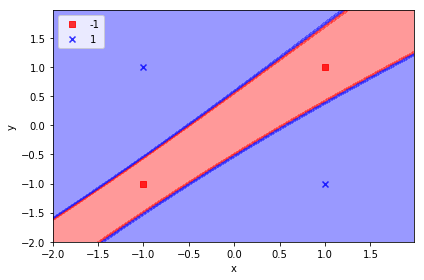

In [7]:
X = np.array([[-1, -1], [-1, 1],
                [1, -1], [1, 1]])

# Set the labels, the correct results for the xor operation
y = np.array([-1, 1, 
                 1, -1])

plot_decision_regions(X, y, nn)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
l_minus_minus_x = []
l_minus_minus_y = []
l_minus_plus_x = []
l_minus_plus_y = []
l_plus_minus_x = []
l_plus_minus_y = []
l_plus_plus_x = []
l_plus_plus_y = []


for j in range(len(int_rep)):
    
    l_minus_minus_x.append(int_rep[j][0][0])
    l_minus_minus_y.append(int_rep[j][0][1])
    l_minus_plus_x.append(int_rep[j][1][0])
    l_minus_plus_y.append(int_rep[j][1][1])
    l_plus_minus_x.append(int_rep[j][2][0])
    l_plus_minus_y.append(int_rep[j][2][1])
    l_plus_plus_x.append(int_rep[j][3][0])
    l_plus_plus_y.append(int_rep[j][3][1])

In [9]:
plot_dynamics(l_minus_minus_x, l_minus_minus_y,
              l_minus_plus_x, l_minus_plus_y,
              l_plus_minus_x, l_plus_minus_y,
              l_plus_plus_x, l_plus_plus_y,
              training= True)

NameError: name 'plot_dynamics' is not defined

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 
                                       sharex=True,
                                       sharey=True,
                                       figsize=(10,15))
ax1.plot(l_minus_minus_x, marker='.', label= '$x_0$ = %d' % l_minus_minus_x[0])
ax1.plot(l_minus_minus_y, marker='.', label= '$y_0$ = %d' % l_minus_minus_y[0])
ax1.legend(fontsize= 12)
ax2.plot(l_minus_plus_x, marker='.', label= '$x_0$ = %d' % l_minus_plus_x[0])
ax2.plot(l_minus_plus_y, marker='.', label= '$y_0$ = %d' % l_minus_plus_y[0])
ax2.legend(fontsize= 12)
ax3.plot(l_plus_minus_x, marker='.', label= '$x_0$ = %d' % l_plus_minus_x[0])
ax3.plot(l_plus_minus_y, marker='.', label= '$y_0$ = %d' % l_plus_minus_y[0])
ax3.legend(fontsize= 12)
ax4.plot(l_plus_plus_x, marker='.', label= '$x_0$ = %d' % l_plus_plus_x[0])
ax4.plot(l_plus_plus_y, marker='.', label= '$y_0$ = %d' % l_plus_plus_y[0])
ax4.legend(fontsize= 12)
ax4.set_xlabel('Epochs', fontsize= 15)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
#plt.xlim(-10, 1000)
#plt.legend()
plt.show()

## Information processing

In [578]:
nn_trained = NeuralNetwork(net_arch,
                           act= 'tanh',
                           W= weights[-1])

In [579]:
x_dynamics = nn_trained.forward(X)

In [583]:
x_dynamics[-1]

array([[-0.99721646],
       [ 0.99719377],
       [ 0.99731929],
       [-0.99731258]])

In [580]:
l_minus_minus_x = []
l_minus_minus_y = []
l_minus_plus_x = []
l_minus_plus_y = []
l_plus_minus_x = []
l_plus_minus_y = []
l_plus_plus_x = []
l_plus_plus_y = []


for j in range(len(x_dynamics) - 1):
    
    l_minus_minus_x.append(x_dynamics[j][0][0])
    l_minus_minus_y.append(x_dynamics[j][0][1])
    l_minus_plus_x.append(x_dynamics[j][1][0])
    l_minus_plus_y.append(x_dynamics[j][1][1])
    l_plus_minus_x.append(x_dynamics[j][2][0])
    l_plus_minus_y.append(x_dynamics[j][2][1])
    l_plus_plus_x.append(x_dynamics[j][3][0])
    l_plus_plus_y.append(x_dynamics[j][3][1])

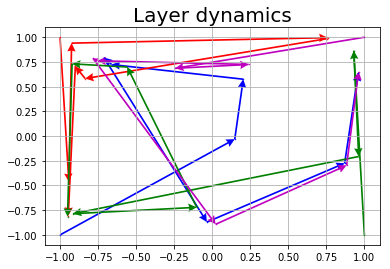

In [581]:
plot_dynamics(l_minus_minus_x, l_minus_minus_y,
              l_minus_plus_x, l_minus_plus_y,
              l_plus_minus_x, l_plus_minus_y,
              l_plus_plus_x, l_plus_plus_y,
              training= False)

In [6]:
def plot_dynamics(l_minus_minus_x, l_minus_minus_y,
                  l_minus_plus_x, l_minus_plus_y,
                  l_plus_minus_x, l_plus_minus_y,
                  l_plus_plus_x, l_plus_plus_y, 
                  training= False):
    
    if training:
        title = 'Training dynamics'
    else:
        title = 'Layer dynamics'
    
    
    xq = np.array(l_minus_minus_x)
    yq = np.array(l_minus_minus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'b', 
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'b')

    ###############################

    xq = np.array(l_minus_plus_x)
    yq = np.array(l_minus_plus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'r',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'r')

    ###############################

    xq = np.array(l_plus_minus_x)
    yq = np.array(l_plus_minus_y)

    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'g',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'g')

    ###############################

    xq = np.array(l_plus_plus_x)
    yq = np.array(l_plus_plus_y)
    
    plt.quiver(xq[:-1], yq[:-1], xq[1:]-xq[:-1], yq[1:]-yq[:-1], 
               scale_units= 'xy', 
               angles= 'xy', 
               scale= 1,
               width= 0.005,
               color= 'm',
               headwidth= 5)
    plt.plot(xq, yq, 'o', markersize= 0.5, color= 'm')

    plt.grid()
    plt.title(title, fontsize= 20)
    plt.show()
    
    